# Draw Found Images

In [4]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import json

import cv2 as cv
import pandas as pd
from PIL import Image, ImageDraw
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import imutils

import sys
sys.path.append('/work/megapixels_dev/megapixels/')
from app.settings import app_cfg as cfg
from app.utils import file_utils, im_utils, draw_utils
from app.models.bbox import BBox

In [5]:
fp_im =  '/data_store/datasets/msc/images_sorted/usconsulatemunich/megaface/7608585114.jpg'
fp_out = '/data_store/datasets/msc/viz/7608585114_draw.jpg'

In [6]:
im = cv.imread(fp_im)
dim = im.shape[0:2][::-1]
im_sm = imutils.resize(im, width=1200)
dim_sm = im_sm.shape[0:2][::-1]
print(dim, dim_sm)

(4928, 3264) (1200, 794)


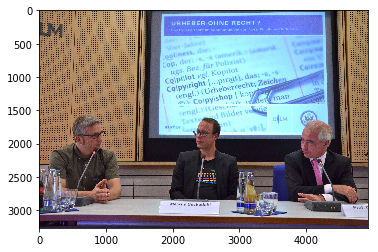

In [7]:
plt.imshow(im_utils.bgr2rgb(im))

In [8]:
# load json
#fp_bbox = '/data_store_hdd/datasets/people/megaface/downloads/MegafaceIdentities_VGG_META/48876008@N05_identity_0/5197570947_1.json'
#fp_bbox = '/data_store_hdd/datasets/people/megaface/downloads/MegafaceIdentities_VGG_META/78557833@N04_identity_6/7608582002_0.json'
fp_bbox = '/data_store_hdd/datasets/people/megaface/downloads/MegafaceIdentities_VGG_META/78557833@N04_identity_3/7608585114_0.json'

meta = file_utils.load_json(fp_bbox)

In [32]:
box = meta['box']
bbox = BBox.from_xyxy_dim(box['left'], box['top'], box['right'], box['bottom'], dim)
box = meta['exp_bb']
bbox_exp = BBox.from_xyxy_dim(box['left'], box['top'], box['right'], box['bottom'], dim)

In [33]:
landmarks = eval(meta['landmarks'].replace('\'', ''))

In [34]:
points_norm = [(pt[0]/dim[0], pt[1]/dim[1]) for pt in landmarks]
points_norm = [(pt[0] + bbox.x, pt[1] + bbox.y) for pt in points_norm]

In [65]:
help(cv.rectangle)

Help on built-in function rectangle:

rectangle(...)
    rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple, thick, or filled up-right rectangle.
    .   
    .   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
    .   are pt1 and pt2.
    .   
    .   @param img Image.
    .   @param pt1 Vertex of the rectangle.
    .   @param pt2 Vertex of the rectangle opposite to pt1 .
    .   @param color Rectangle color or brightness (grayscale image).
    .   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
    .   mean that the function has to draw a filled rectangle.
    .   @param lineType Type of the line. See #LineTypes
    .   @param shift Number of fractional bits in the point coordinates.
    
    
    
    rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
    .   @overload
    .   
    .   use `rec` parameter as alterna

In [72]:
white = (255,255,255)
yellow = (0,255,255)
cyan = (255,255,0)
pink = (255,0,255)
red = (0,0,255)
green=(0,255,0)
im_draw = im_sm.copy()
im_draw = draw_utils.draw_bbox(im_draw, bbox_exp, stroke_weight=3, color=green)
im_draw = draw_utils.draw_bbox(im_draw, bbox, stroke_weight=3, color=green)
im_draw = draw_utils.draw_landmarks2D(im_draw, points_norm, radius=2, color=green)

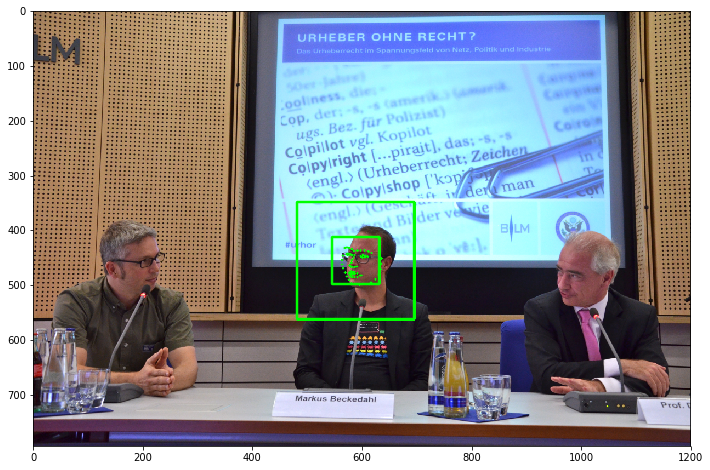

In [73]:
plt.figure(figsize=(12, 8))
plt.imshow(im_utils.bgr2rgb(im_draw))

In [74]:
cv.imwrite(fp_out, im_draw)

True